### EDA of Multi-Label News Dataset

In [1]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector \
    , DataTypesInspectionStrategy \
    , SummaryStatisticsTextInspectionStrategy \
    , TextLengthHistogramInspectionStrategy \
    , TargetCategoriesBasicInspectionStrategy \
    , TargetCategoriesCorrelationInspectionStrategy 

from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
data_path = '../extracted_data/multi-label-news-categorization.json'
df = pd.read_json(data_path,  orient='records', lines=True)

In [3]:
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13914 entries, 0 to 13913
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   data_id                                    10917 non-null  float64       
 1   id                                         10917 non-null  object        
 2   date                                       13914 non-null  datetime64[ns]
 3   source                                     13914 non-null  object        
 4   title                                      13914 non-null  object        
 5   content                                    13913 non-null  object        
 6   author                                     10602 non-null  object        
 7   url                                        13914 non-null  object        
 8   published                                  10917 non-null  obje

**There are 13914 news and 17 target categories**

In [4]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsTextInspectionStrategy())
data_inspector.execute_inspection(df)


Average length of the news:
712.5248328901027

Min and Max length of the news:
0 17866

Vocabulary size: 403838

Avg, Min, Max character count:
4393.264069575217 0.0 100000.0


**Some rows have no text, will need to remove them later**

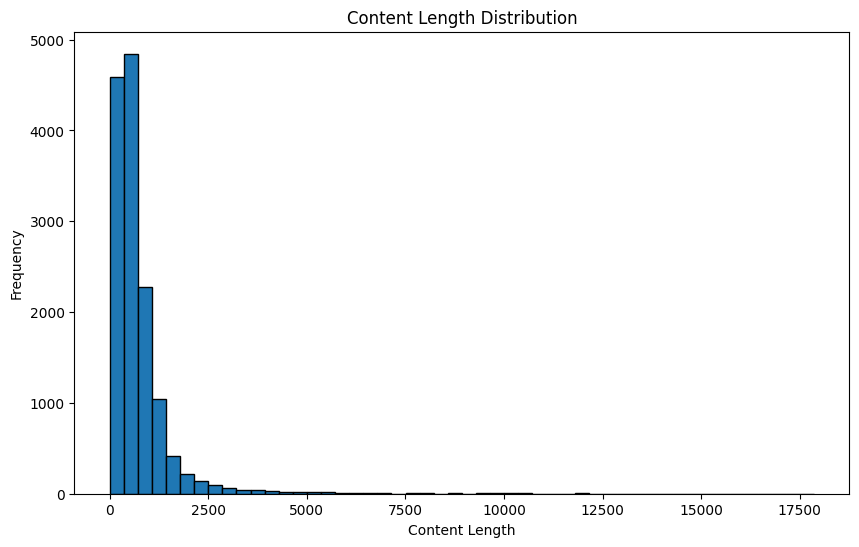

In [7]:
data_inspector.set_strategy(TextLengthHistogramInspectionStrategy())
data_inspector.execute_inspection(df)

**Most news have less than 2000 words, the average length is 712**

In [5]:
data_inspector = DataInspector(TargetCategoriesBasicInspectionStrategy())
data_inspector.execute_inspection(df)


Category Stats:
                                           Count  Percentage
politics                                    2876   20.669829
society                                     2778   19.965502
science and technology                      2379   17.097887
arts, culture, entertainment and media      1553   11.161420
economy, business and finance               1432   10.291792
health                                      1381    9.925255
human interest                              1352    9.716832
sport                                       1308    9.400604
conflict, war and peace                     1298    9.328734
religion and belief                         1125    8.085382
crime, law and justice                      1057    7.596665
environment                                 1032    7.416990
labour                                       933    6.705476
disaster, accident and emergency incident    898    6.453931
education                                    838    6.022711
lifesty

**Now looking at the target categories:**
* politics, society and science & technology are the top 3
* education, lifestyle & leisure and weather are the bottom 3
* on average, a news could belong to 1.67 categories

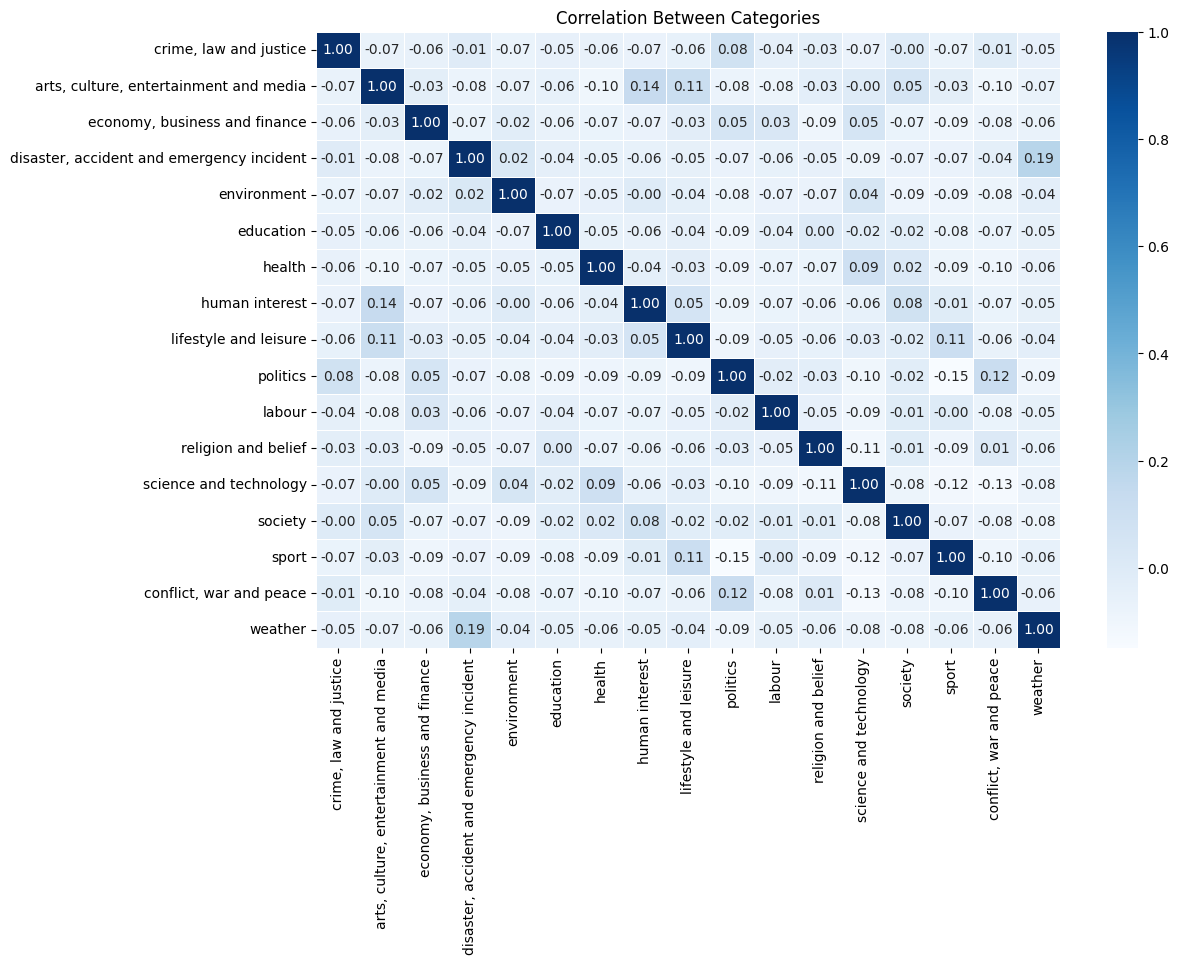

In [6]:
data_inspector = DataInspector(TargetCategoriesCorrelationInspectionStrategy())
data_inspector.execute_inspection(df)

**A piece of news article is likely to have multiple topics, inpsecting the correlation between the categories can be helpful (as a sanity check).**
* `weather` and `disaster, accident and emergency incident` have relatively higher correlation.
* `human interest` and `arts, culture, entertainment and media` also have relatively higher correlation.
* `politics` and `weather` have negative correlation.

This dataset's labelling look valid from this heatmap.


Missing Values Count by Column:
data_id            2997
id                 2997
content               1
author             3312
published          2997
published_utc      2997
collection_utc     2997
index             10917
Description       13914
Keywords          13914
Theme             13914
char_count            1
dtype: int64

Visualizing Missing Values...


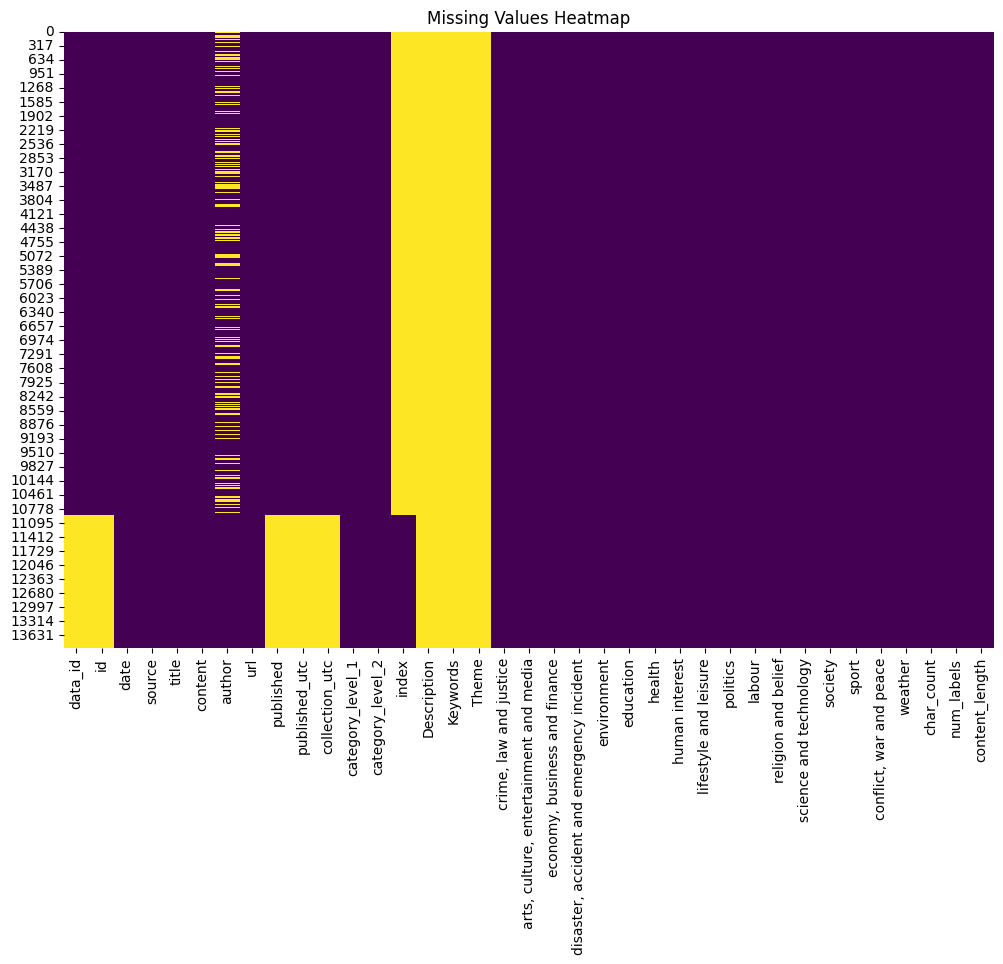

In [8]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

We are only using the content and target categories, so the rest of the missing data can be ignored for this task.

**Overall, the dataset looks valid, the categorization itself looks reasonable.**